## Problem 2: Calculate and visualise the *dominance areas* of shopping centres (10 points)

In this problem, the aim is to delineate the dominance area of each shopping centre. For this
exercise, we define the ‘dominance area’ of a shopping centre as the area from which it can
be reached faster than other shopping centres. We will use public transport travel times.

![](https://github.com/Automating-GIS-processes-II-2023/Exercise-4/blob/main/images/dominance_areas_example_1000x500px.png?raw=1)

*Sample result: a map showing the areas of dominance of each shopping centre, and the travel
times to the closest shopping centre in the entire metropolitan area*



---

### Data

The **input data** is identical to what you have used for *problem 1*,
see [there](./Exercise-4-problem-1.ipynb) for detailed data descriptions.

---


### An overview of the tasks

This task comprises of three major subtasks. In contrast to earlier exercises, we
do not provide a detailed, step-by-step ‘cooking recipe’. Rather, you are free to
implement the necessary steps in any order you see fit, and choose any variable
names of your liking.

To test intermediate results, implement `assert` statements, output the `head()`
of a data frame, or plot the data. Remember to add comments to all of your code,
so future you (and us) can understand what each section does.

The **only strict requirement** is the **file name** of
the **output** map plot: `DATA_DIRECTORY / "dominance_areas.png"`.

1. Load the YKR grid and the individual travel time data sets, and combine them
   into one geo data frame. This is essentially the same as *problem 1*, except
   that you must load all eight shopping centre data files. (2 points)
2. Find the closest shopping centre to each grid cell. In the combined data set,
   find the minimum travel time to any of the shopping centres, save the value in
   a new column, and shopping centre name in another new column. (4 points)
   See the [hints](https://autogis-site.readthedocs.io/en/latest/lessons/lesson-4/exercise-4.html#hints)
   to this exercise for a suggestions on how to achieve this
   ([`pandas.DataFrame.min()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.min.html) and
   [`pandas.DataFrame.idxmin()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.idxmin.html)
   will be helpful)
3. Visualise the dominance areas and travel times. Use 2⨉1 subplots to plot
   the most dominant (closest) shopping centre for each grid cell, and the
   travel time to the closest shopping centre for each grid cell. (4 points)

---


In [ ]:
import pathlib
NOTEBOOK_PATH = pathlib.Path().resolve()
DATA_DIRECTORY = NOTEBOOK_PATH / "data"

In [33]:
# ADD YOUR OWN CODE HERE
import geopandas
import pandas

grid = geopandas.read_file("/content/YKR_grid_EPSG3067.gpkg", sep=';')
jumbo = pandas.read_csv("/content/travel_times_to_5878070_Jumbo.txt", sep=';')
dixi = pandas.read_csv("/content/travel_times_to_5878087_Dixi.txt", sep=';')
myyrmanni = pandas.read_csv("/content/travel_times_to_5902043_Myyrmanni.txt", sep=';')
itis = pandas.read_csv("/content/travel_times_to_5944003_Itis.txt", sep=';')
forum = pandas.read_csv("/content/travel_times_to_5975373_Forum.txt", sep=';')
iso = pandas.read_csv("/content/travel_times_to_5978593_Iso_Omena.txt", sep=';')
ruo = pandas.read_csv("/content/travel_times_to_5980260_Ruoholahti.txt", sep=';')

In [34]:
print(jumbo.columns)

Index(['from_id', 'to_id', 'walk_t', 'walk_d', 'car_r_t', 'car_r_d', 'car_m_t',
       'car_m_d', 'pt_r_t', 'pt_r_tt', 'pt_r_d', 'pt_m_t', 'pt_m_tt',
       'pt_m_d'],
      dtype='object')


In [35]:
jumbo.head()

,from_id,to_id,walk_t,walk_d,car_r_t,car_r_d,car_m_t,car_m_d,pt_r_t,pt_r_tt,pt_r_d,pt_m_t,pt_m_tt,pt_m_d
0,5785640,5878070,318,22279,39,23233,34,23233,101,131,24276,106,138,22627
1,5785641,5878070,281,19662,39,23444,34,23444,108,129,26134,109,137,22833
2,5785642,5878070,282,19742,45,17666,41,17666,109,129,26251,111,137,22951
3,5785643,5878070,286,20034,46,24695,40,24698,114,138,26544,115,141,23244
4,5787544,5878070,311,21789,38,22807,33,22807,98,115,25438,90,113,22138


In [36]:
# ADD YOUR OWN CODE HERE
jumbo = jumbo[['pt_r_t', 'from_id', 'to_id']]
dixi = dixi[['pt_r_t', 'from_id', 'to_id']]
myyrmanni = myyrmanni[['pt_r_t', 'from_id', 'to_id']]
itis = itis[['pt_r_t', 'from_id', 'to_id']]
forum = forum[['pt_r_t', 'from_id', 'to_id']]
iso = iso[['pt_r_t', 'from_id', 'to_id']]
ruo = ruo[['pt_r_t', 'from_id', 'to_id']]

In [37]:
jumbo.head()

,pt_r_t,from_id,to_id
0,101,5785640,5878070
1,108,5785641,5878070
2,109,5785642,5878070
3,114,5785643,5878070
4,98,5787544,5878070


In [39]:
itis = itis.rename(columns={'pt_r_t': 'pt_r_t_itis', 'from_id': 'from_id_itis', 'to_id': 'to_id_itis'})
iso = iso.rename(columns={'pt_r_t': 'pt_r_t_iso','from_id': 'from_id_iso', 'to_id': 'to_id_iso' })
ruo = ruo.rename(columns={'pt_r_t': 'pt_r_t_ruo','from_id': 'from_id_ruo', 'to_id': 'to_id_ruo' })
forum = forum.rename(columns={'pt_r_t': 'pt_r_t_forum','from_id': 'from_id_forum', 'to_id': 'to_id_forum' })
myyrmanni = myyrmanni.rename(columns={'pt_r_t': 'pt_r_t_myyrmanni','from_id': 'from_id_myyrmanni', 'to_id': 'to_id_myyrmanni' })
dixi = dixi.rename(columns={'pt_r_t': 'pt_r_t_dixi','from_id': 'from_id_dixi', 'to_id': 'to_id_dixi' })
jumbo = jumbo.rename(columns={'pt_r_t': 'pt_r_t_jumbo','from_id': 'from_id_jumbo', 'to_id': 'to_id_jumbo' })

In [43]:
jumbo.head()

,pt_r_t_jumbo,from_id_jumbo,to_id_jumbo
0,101,5785640,5878070
1,108,5785641,5878070
2,109,5785642,5878070
3,114,5785643,5878070
4,98,5787544,5878070


In [44]:
# prompt: from_id: the YKR_ID of the origin grid cell
# to_id: refers to the YKR_ID of the destination grid cell (here: the one containing the shopping centre).
# pt_r_t: how long does it take to travel from from_id to to_id, in minutes, using public transport?
# Join all columnns

df = grid.merge(jumbo, left_on='YKR_ID', right_on='from_id_jumbo', how='left')
df = df.merge(dixi, left_on='YKR_ID', right_on='from_id_dixi', how='left')
df = df.merge(myyrmanni, left_on='YKR_ID', right_on='from_id_myyrmanni', how='left')
df = df.merge(itis, left_on='YKR_ID', right_on='from_id_itis', how='left')
df = df.merge(forum, left_on='YKR_ID', right_on='from_id_forum', how='left')
df = df.merge(iso, left_on='YKR_ID', right_on='from_id_iso', how='left')
df = df.merge(ruo, left_on='YKR_ID', right_on='from_id_ruo', how='left')
df.head()


,YKR_ID,geometry,pt_r_t_jumbo,from_id_jumbo,to_id_jumbo,pt_r_t_dixi,from_id_dixi,to_id_dixi,pt_r_t_myyrmanni,from_id_myyrmanni,...,to_id_itis,pt_r_t_forum,from_id_forum,to_id_forum,pt_r_t_iso,from_id_iso,to_id_iso,pt_r_t_ruo,from_id_ruo,to_id_ruo
0,5785640,"POLYGON ((382000.000 6697750.000, 381750.000 6...",101,5785640,5878070,102,5785640,5878087,90,5785640,...,5944003,110,5785640,5975373,141,5785640,5978593,118,5785640,5980260
1,5785641,"POLYGON ((382250.000 6697750.000, 382000.000 6...",108,5785641,5878070,109,5785641,5878087,93,5785641,...,5944003,113,5785641,5975373,143,5785641,5978593,121,5785641,5980260
2,5785642,"POLYGON ((382500.000 6697750.000, 382250.000 6...",109,5785642,5878070,111,5785642,5878087,95,5785642,...,5944003,115,5785642,5975373,145,5785642,5978593,123,5785642,5980260
3,5785643,"POLYGON ((382750.000 6697750.000, 382500.000 6...",114,5785643,5878070,115,5785643,5878087,99,5785643,...,5944003,119,5785643,5975373,149,5785643,5978593,127,5785643,5980260
4,5787544,"POLYGON ((381250.000 6697500.000, 381000.000 6...",98,5787544,5878070,99,5787544,5878087,83,5787544,...,5944003,103,5787544,5975373,134,5787544,5978593,111,5787544,5980260


In [45]:
# ADD YOUR OWN CODE HERE
df.head()

,YKR_ID,geometry,pt_r_t_jumbo,from_id_jumbo,to_id_jumbo,pt_r_t_dixi,from_id_dixi,to_id_dixi,pt_r_t_myyrmanni,from_id_myyrmanni,...,to_id_itis,pt_r_t_forum,from_id_forum,to_id_forum,pt_r_t_iso,from_id_iso,to_id_iso,pt_r_t_ruo,from_id_ruo,to_id_ruo
0,5785640,"POLYGON ((382000.000 6697750.000, 381750.000 6...",101,5785640,5878070,102,5785640,5878087,90,5785640,...,5944003,110,5785640,5975373,141,5785640,5978593,118,5785640,5980260
1,5785641,"POLYGON ((382250.000 6697750.000, 382000.000 6...",108,5785641,5878070,109,5785641,5878087,93,5785641,...,5944003,113,5785641,5975373,143,5785641,5978593,121,5785641,5980260
2,5785642,"POLYGON ((382500.000 6697750.000, 382250.000 6...",109,5785642,5878070,111,5785642,5878087,95,5785642,...,5944003,115,5785642,5975373,145,5785642,5978593,123,5785642,5980260
3,5785643,"POLYGON ((382750.000 6697750.000, 382500.000 6...",114,5785643,5878070,115,5785643,5878087,99,5785643,...,5944003,119,5785643,5975373,149,5785643,5978593,127,5785643,5980260
4,5787544,"POLYGON ((381250.000 6697500.000, 381000.000 6...",98,5787544,5878070,99,5787544,5878087,83,5787544,...,5944003,103,5787544,5975373,134,5787544,5978593,111,5787544,5980260


<Axes: >

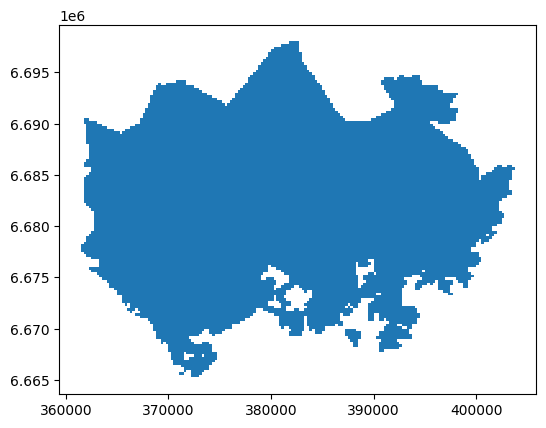

In [25]:
df.plot()

In [53]:
# prompt: Find the closest shopping centre to each grid cell. In the combined data set, find the minimum travel time to any of the shopping centres, save the value in a new column, and shopping centre name in another new column.

import pandas as pd

# Find the minimum travel time to any shopping centre for each grid cell
df['min_travel_time'] = df[['travel_time_jumbo', 'travel_time_dixi', 'travel_time_myyrmanni', 'travel_time_itis', 'travel_time_forum', 'travel_time_iso', 'travel_time_ruoholahti']].min(axis=1)


# Rename the columns for clarity
df.rename(columns={
    'pt_r_t_jumbo': 'travel_time_jumbo',
    'pt_r_t_dixi': 'travel_time_dixi',
    'pt_r_t_myyrmanni': 'travel_time_myyrmanni',
    'pt_r_t_itis': 'travel_time_itis',
    'pt_r_t_forum': 'travel_time_forum',
    'pt_r_t_iso': 'travel_time_iso',
    'pt_r_t_ruo': 'travel_time_ruoholahti'
}, inplace=True)

# Print the head of the dataframe
df.head()


,YKR_ID,geometry,travel_time_jumbo,from_id_jumbo,to_id_jumbo,travel_time_dixi,from_id_dixi,to_id_dixi,travel_time_myyrmanni,from_id_myyrmanni,...,from_id_forum,to_id_forum,travel_time_iso,from_id_iso,to_id_iso,travel_time_ruoholahti,from_id_ruo,to_id_ruo,min_travel_time,closest_shopping_centre
0,5785640,"POLYGON ((382000.000 6697750.000, 381750.000 6...",101,5785640,5878070,102,5785640,5878087,90,5785640,...,5785640,5975373,141,5785640,5978593,118,5785640,5980260,90,pt_r_t_myyrmanni
1,5785641,"POLYGON ((382250.000 6697750.000, 382000.000 6...",108,5785641,5878070,109,5785641,5878087,93,5785641,...,5785641,5975373,143,5785641,5978593,121,5785641,5980260,93,pt_r_t_myyrmanni
2,5785642,"POLYGON ((382500.000 6697750.000, 382250.000 6...",109,5785642,5878070,111,5785642,5878087,95,5785642,...,5785642,5975373,145,5785642,5978593,123,5785642,5980260,95,pt_r_t_myyrmanni
3,5785643,"POLYGON ((382750.000 6697750.000, 382500.000 6...",114,5785643,5878070,115,5785643,5878087,99,5785643,...,5785643,5975373,149,5785643,5978593,127,5785643,5980260,99,pt_r_t_myyrmanni
4,5787544,"POLYGON ((381250.000 6697500.000, 381000.000 6...",98,5787544,5878070,99,5787544,5878087,83,5787544,...,5787544,5975373,134,5787544,5978593,111,5787544,5980260,83,pt_r_t_myyrmanni


In [51]:
df.columns

Index(['YKR_ID', 'geometry', 'travel_time_jumbo', 'from_id_jumbo',
       'to_id_jumbo', 'travel_time_dixi', 'from_id_dixi', 'to_id_dixi',
       'travel_time_myyrmanni', 'from_id_myyrmanni', 'to_id_myyrmanni',
       'travel_time_itis', 'from_id_itis', 'to_id_itis', 'travel_time_forum',
       'from_id_forum', 'to_id_forum', 'travel_time_iso', 'from_id_iso',
       'to_id_iso', 'travel_time_ruoholahti', 'from_id_ruo', 'to_id_ruo',
       'min_travel_time', 'closest_shopping_centre'],
      dtype='object')

In [55]:
# prompt: remove a prefix from all values in a coloumn

df['closest_shopping_centre'] = df['closest_shopping_centre'].str.replace('pt_r_t_', '')


In [57]:


df['closest_shopping_centre'] = df['closest_shopping_centre'].str.capitalize()


In [58]:
df.head()

,YKR_ID,geometry,travel_time_jumbo,from_id_jumbo,to_id_jumbo,travel_time_dixi,from_id_dixi,to_id_dixi,travel_time_myyrmanni,from_id_myyrmanni,...,from_id_forum,to_id_forum,travel_time_iso,from_id_iso,to_id_iso,travel_time_ruoholahti,from_id_ruo,to_id_ruo,min_travel_time,closest_shopping_centre
0,5785640,"POLYGON ((382000.000 6697750.000, 381750.000 6...",101,5785640,5878070,102,5785640,5878087,90,5785640,...,5785640,5975373,141,5785640,5978593,118,5785640,5980260,90,Myyrmanni
1,5785641,"POLYGON ((382250.000 6697750.000, 382000.000 6...",108,5785641,5878070,109,5785641,5878087,93,5785641,...,5785641,5975373,143,5785641,5978593,121,5785641,5980260,93,Myyrmanni
2,5785642,"POLYGON ((382500.000 6697750.000, 382250.000 6...",109,5785642,5878070,111,5785642,5878087,95,5785642,...,5785642,5975373,145,5785642,5978593,123,5785642,5980260,95,Myyrmanni
3,5785643,"POLYGON ((382750.000 6697750.000, 382500.000 6...",114,5785643,5878070,115,5785643,5878087,99,5785643,...,5785643,5975373,149,5785643,5978593,127,5785643,5980260,99,Myyrmanni
4,5787544,"POLYGON ((381250.000 6697500.000, 381000.000 6...",98,5787544,5878070,99,5787544,5878087,83,5787544,...,5787544,5975373,134,5787544,5978593,111,5787544,5980260,83,Myyrmanni


<Axes: >

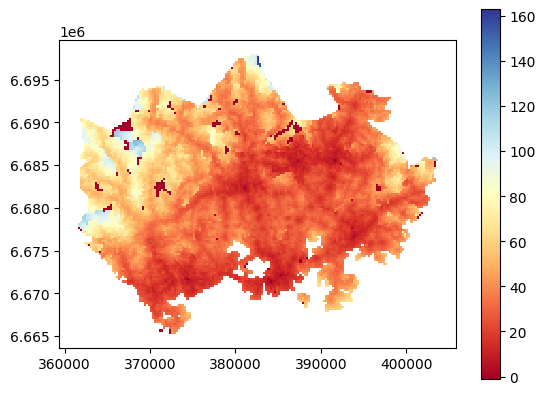

In [47]:
# ADD YOUR OWN CODE HERE
df.plot(column="min_travel_time",cmap="RdYlBu", linewidth=0, legend=True)

<Axes: >

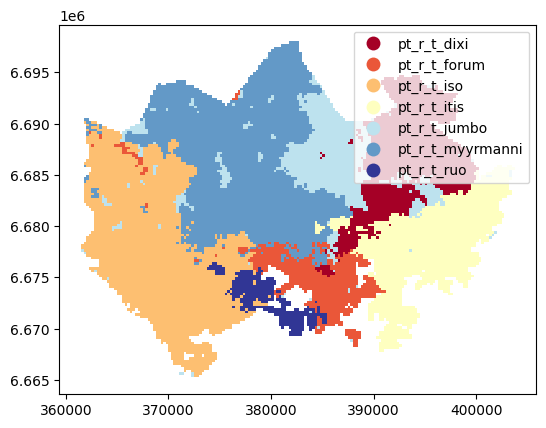

In [48]:
df.plot(column="closest_shopping_centre",cmap="RdYlBu", linewidth=0, legend=True)

In [ ]:
# NON-EDITABLE TEST CELL
# Check that output figure file exists
assert (DATA_DIRECTORY / "dominance_areas.png").exists()


---

**Do not forget to plot the result map, and save it to `DATA_DIRECTORY / "dominance_areas.png"`!**

---

## Reflections

This was a significantly more complex exercise that previous ones, and it included finding
a solution yourself.

- What was most difficult part?
- Where did you get stuck?
- What was the easiest, and
- what was the most fun part of this exercise?

Add your answer below


---

## Well done!

Congratulations, you completed exercise 4. Good Job!